In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import numpy as np
from scipy import stats
from sklearn import mixture


In [2]:
# def find_remove_outlier(data):
#     # calculate summary statistics
#     mean, std = npm.mean(data), npm.std(data)
#     cleaned_list = [(x > (std*3)-mean) or (x > (std*3)+mean) for x in data]
#     return cleaned_list

In [6]:
def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data_sample), np.std(data_sample)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed


In [7]:

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

In [10]:
y = np.array([-5, 11, 14])
x =  np.concatenate((stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(stats.iqr(x))
print(find_remove_outlier(x))

<class 'numpy.ndarray'>
[8.287883726793112, -5.0, 11.0, 14.0]
1.4182664817874073
([-5.0, 11.0, 14.0], [5.736666898144835, 6.592964315993083, 3.5567421765272664, 5.567754167928959, 5.100118844836191, 7.572082609441106, 5.060910903858577, 5.439540925533062, 5.508579492499209, 5.759075586946494, 4.147612907616859, 4.783947763985316, 5.014110512582253, 7.161487189731792, 5.641375080511044, 5.258462051013475, 6.506759779683643, 4.504859169786194, 5.708466161187435, 5.686822243596516, 3.6380262189813166, 4.095633070623327, 5.756746038578529, 5.147897727889794, 3.5537592556119115, 5.944716165467093, 4.935735295103395, 6.0147608161470245, 4.559141761530156, 4.981864654346629, 3.082445691999992, 2.3403317629131184, 3.555545357150386, 4.270509972796479, 4.339600700872345, 4.538179165197246, 4.671477920851966, 4.931813794580992, 3.7885706948933224, 3.3979040487434835, 5.3542895323981945, 5.243261453888025, 8.287883726793112, 3.329027224980483, 6.52327084966456, 4.854778161416149, 4.45841029843496

### How we can visually see the outlier

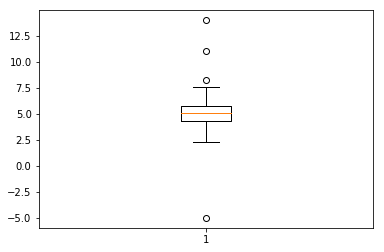

In [11]:
plt.boxplot(x)

plt.show()

# Statistical Analysis

# Two apporoximate histogram methods
#### - Gaussian Mixture Model(GMM)
#### - Kernel Density Estimatoin(KDE)

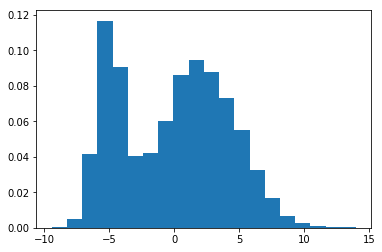

In [12]:
# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

In [17]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print("GMM means_: ",gmm.means_)
print("GMM covariances_:",gmm.covariances_)
print("GMM weights_:",gmm.weights_)

GMM means_:  [[ 2.13223571]
 [-4.95781815]]
GMM covariances_: [[[8.2147552 ]]

 [[1.08890077]]]
GMM weights_: [0.686614 0.313386]


## The GMM has learn the probability density function of our data sample

#### Lets the gmm model generate sample from its model:

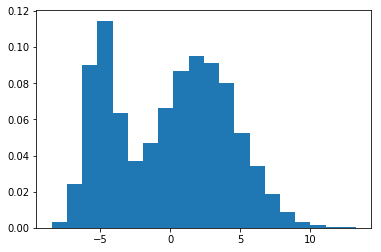

In [18]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

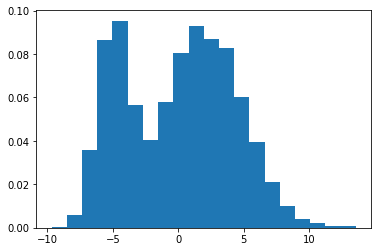

In [22]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

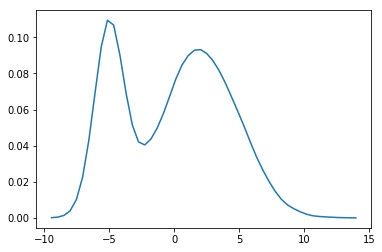

In [20]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))